Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


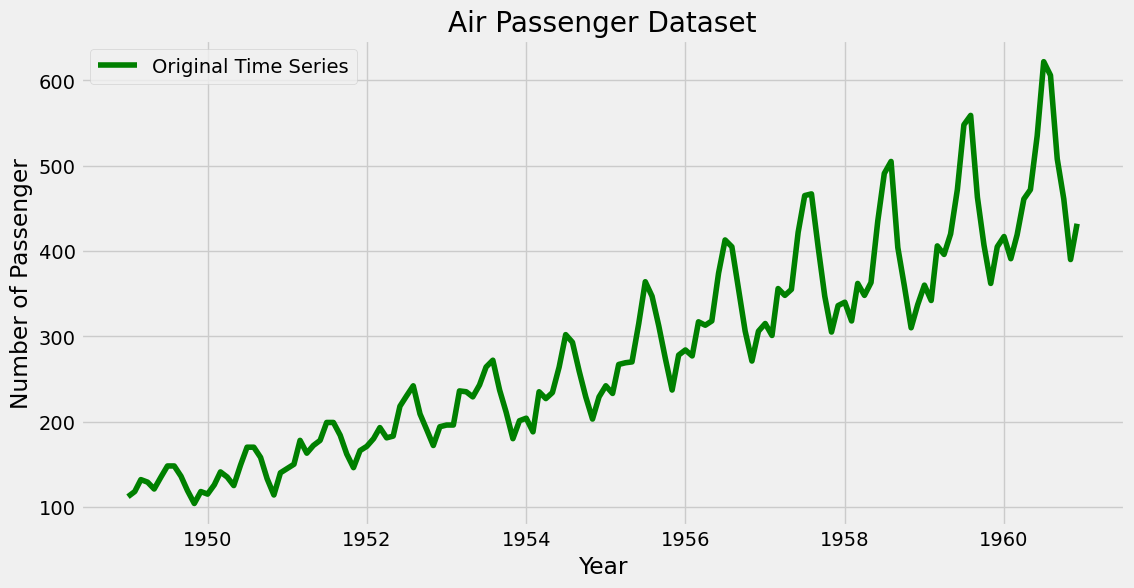

In [2]:
#let's visualize the dataset
plt.style.use("fivethirtyeight")

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Passengers"], label="Original Time Series", color="green")
plt.title("Air Passenger Dataset")
plt.xlabel("Year")
plt.ylabel("Number of Passenger")
plt.legend()
plt.show()

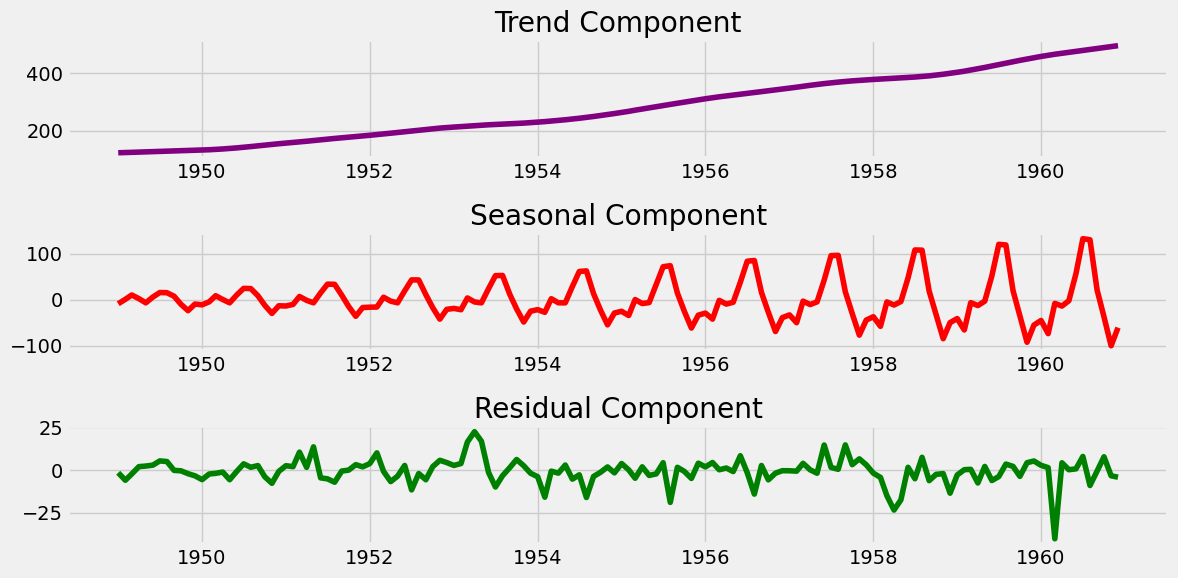

In [22]:
#perform STL decomposition
stl = STL(df["Passengers"], seasonal=13, robust=True)
results = stl.fit()

#plot the decomposition components
fig , (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 6))

ax1.plot(df.index, results.trend, label='Trend', color='purple')
ax1.set_title('Trend Component')
ax2.plot(df.index, results.seasonal, label='Seasonal', color='red')
ax2.set_title('Seasonal Component')
ax3.plot(df.index, results.resid, label='Residual', color="green")
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()


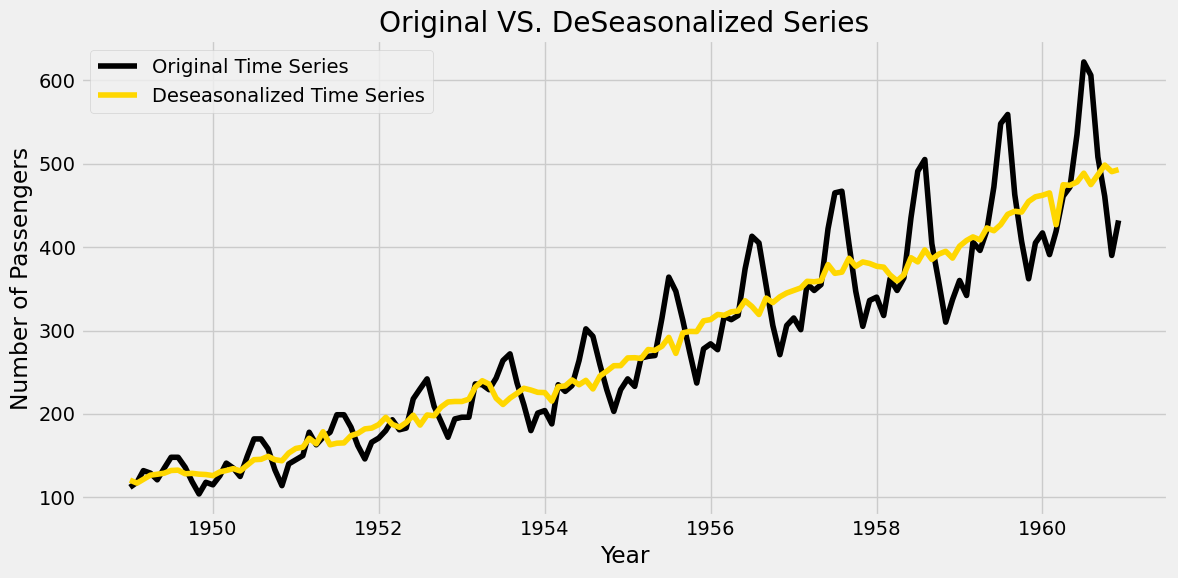

In [25]:
# Create a deseasonalized time series
deseasonalized_series = df["Passengers"] - results.seasonal

#visualize the comparative plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Passengers"], label="Original Time Series", color="black")
plt.plot(df.index, deseasonalized_series, label="Deseasonalized Time Series", color="gold")
plt.title("Original VS. DeSeasonalized Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()

